In [1]:
import scipy
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt_lab
import matplotlib.gridspec as gridspec
import obspy
import pandas as pd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
heart = pd.read_excel("/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Summary_Pub_Deidentified.xlsx")
df = heart.copy().fillna(0)

In [3]:
df.drop(["Mitral valve Peak velocity (m/sec)",
         "Mitral valve Mean gradient(mmHg)", 
         "Echo available",
        "Date of collection",
        "Date of echo"], 
        inplace = True, axis = 1)
df.drop(df.tail(1).index,inplace=True)

In [4]:
idx_MS = np.where((df['Moderate or greater MS'] == 1.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_MS = df.loc[idx_MS]

idx_MR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 1.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_MR = df.loc[idx_MR]

idx_AR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 1.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_AR = df.loc[idx_AR]

idx_AS = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 1.0)  
                  & (df['moderate or greater TR'] == 0.0))
diseased_AS = df.loc[idx_AS]

In [5]:
from scipy.stats import mannwhitneyu

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.
For the test to be effective, it requires at least 20 observations in each data sample.



In [6]:
record1, record2, record3, record4, record5, record6 = [], [], [], [], [], []

In [7]:
for i in range(10):
    random_MS = diseased_MS.sample(n = 3, axis = 0).drop(["Patient ID", "Start", "Duration", "Gender"], axis = 1)
    random_MS = pd.get_dummies(random_MS)

    random_MR = diseased_MR.sample(n = 3, axis = 0).drop(["Patient ID", "Start", "Duration", "Gender"], axis = 1)
    random_MR = pd.get_dummies(random_MR)
    
    random_AS = diseased_AS.sample(n = 3, axis = 0).drop(["Patient ID", "Start", "Duration", "Gender"], axis = 1)
    random_AS = pd.get_dummies(random_AS)
    
    random_AR = diseased_AR.sample(n = 3, axis = 0).drop(["Patient ID", "Start", "Duration", "Gender"], axis = 1)
    random_AR = pd.get_dummies(random_AR)
    
    
    record1.append(mannwhitneyu(random_MR, random_MS, use_continuity=False, alternative = 'two-sided'))
    record2.append(mannwhitneyu(random_MR, random_AS, use_continuity=False, alternative = 'two-sided'))
    record3.append(mannwhitneyu(random_MR, random_AR, use_continuity=False, alternative = 'two-sided'))
    record4.append(mannwhitneyu(random_MS, random_AS, use_continuity=False, alternative = 'two-sided'))
    record5.append(mannwhitneyu(random_MS, random_AR, use_continuity=False, alternative = 'two-sided'))
    record6.append(mannwhitneyu(random_AS, random_AR, use_continuity=False, alternative = 'two-sided'))

    

In [8]:
columns = diseased_MR.copy().drop(["Patient ID", "Start", "Duration", "Gender"], axis = 1)
columns  = pd.get_dummies(columns).columns

In [9]:
df_stats_ms = pd.DataFrame()
df_stats_as = pd.DataFrame()
df_stats_ar = pd.DataFrame()
df_stats_ms_as = pd.DataFrame()
df_stats_ms_ar = pd.DataFrame()
df_stats_as_ar = pd.DataFrame()

In [10]:
for i in range(10):
    new_stats = pd.DataFrame(data = record1[i], columns = columns)
    df_stats_ms = pd.concat([df_stats_ms, new_stats], axis = 0)

In [11]:
for i in range(10):
    new_stats = pd.DataFrame(data = record2[i], columns = columns)
    df_stats_as = pd.concat([df_stats_as, new_stats], axis = 0)

In [12]:
for i in range(10):
    new_stats = pd.DataFrame(data = record3[i], columns = columns)
    df_stats_ar = pd.concat([df_stats_ar, new_stats], axis = 0)

In [13]:
for i in range(10):
    new_stats = pd.DataFrame(data = record4[i], columns = columns)
    df_stats_ms_as = pd.concat([df_stats_ms_as, new_stats], axis = 0)

In [14]:
for i in range(10):
    new_stats = pd.DataFrame(data = record5[i], columns = columns)
    df_stats_ms_ar = pd.concat([df_stats_ms_ar, new_stats], axis = 0)

In [15]:
for i in range(10):
    new_stats = pd.DataFrame(data = record6[i], columns = columns)
    df_stats_as_ar = pd.concat([df_stats_as_ar, new_stats], axis = 0)

We decide that a confidence level of 95% is required to reject the null hypothesis in favor of the alternative that the distributions are different.

In [16]:
df_p_ms = df_stats_ms.drop([i for i in df_stats_ms.index if (df_stats_ms.index[i] %2 == 0)], axis=0)

In [17]:
df_p_ms.reset_index(inplace =True)

In [18]:
df_p_ms.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,index,Sampling rate(Hz),Age,Height (cm),Weight (kg),History of MI,History of CABG,History of PCI,AOD (mm),LAD (mm),LVDs,Ejection fraction (%),Left ventricular end diastolic dimension (mm),IVS (mm),LVPW (mm),RAD,RVDd,FS,TAPSE,Aortic valve area (cm2),Aortic valve area Mean gradient(mmHg),Aortic valve area Peak velocity (m/sec),Mitral valve area (cm2),Moderate or greater MS,Moderate or greater MR,Moderate or greater AR,Moderate or greater AS,moderate or greater TR
0,1,nan,0.512691,0.375825,0.275234,nan,nan,nan,0.824778,0.268286,0.268286,0.512691,0.184039,0.033895,0.025347,0.512691,0.375825,0.512691,0.046302,nan,nan,nan,0.036904,0.025347,0.025347,nan,nan,nan
1,1,nan,0.046302,0.275234,0.126630,nan,nan,nan,0.046302,0.375825,0.506555,0.506555,0.104571,0.506555,1.000000,0.824778,0.657905,0.506555,0.104571,nan,nan,nan,0.036904,0.025347,0.025347,nan,nan,nan
2,1,nan,0.049535,0.512691,0.275234,nan,nan,nan,0.043114,0.816639,0.506555,0.827259,0.275234,0.345779,0.317311,0.275234,0.268286,0.827259,0.657905,nan,nan,nan,0.506555,0.025347,0.025347,nan,nan,nan
3,1,nan,0.126630,0.827259,0.512691,nan,nan,nan,0.072198,0.827259,0.827259,0.827259,0.512691,0.796253,0.317311,0.512691,1.000000,0.827259,0.657905,nan,nan,nan,0.036904,0.025347,0.025347,nan,nan,nan
4,1,nan,0.049535,0.512691,0.126630,nan,nan,nan,0.121183,0.375825,0.512691,0.512691,0.512691,0.637352,0.317311,0.512691,0.275234,0.657905,0.506555,nan,nan,nan,0.036904,0.025347,0.025347,nan,nan,nan
5,1,nan,0.049535,0.827259,0.275234,nan,nan,0.317311,0.824778,0.184039,0.827259,0.512691,0.512691,0.653095,0.113846,0.275234,0.657905,0.506555,0.375825,nan,nan,nan,0.506555,0.025347,0.025347,nan,nan,nan
6,1,nan,0.506555,0.184039,0.275234,nan,nan,nan,0.506555,1.000000,0.275234,0.512691,0.184039,0.653095,0.317311,0.827259,0.824778,0.512691,0.375825,nan,nan,nan,0.506555,0.025347,0.025347,nan,nan,nan
7,1,nan,0.049535,0.657905,0.126630,nan,nan,nan,0.121183,0.512691,0.268286,0.827259,0.184039,0.653095,1.000000,0.275234,0.275234,0.827259,0.104571,nan,nan,nan,0.036904,0.025347,0.025347,nan,nan,nan
8,1,nan,0.049535,0.827259,0.275234,nan,nan,0.317311,0.824778,0.184039,0.827259,0.512691,0.512691,0.653095,0.113846,0.275234,0.657905,0.506555,0.375825,nan,nan,nan,0.506555,0.025347,0.025347,nan,nan,nan
9,1,nan,0.049535,0.512691,0.126630,nan,nan,nan,0.115688,0.072198,0.506555,0.827259,0.375825,0.361310,0.113846,0.827259,0.657905,0.657905,0.036904,nan,nan,nan,0.036904,0.025347,0.025347,nan,nan,nan


In [19]:
df_p_as = df_stats_as.drop([i for i in df_stats_as.index if (df_stats_as.index[i] %2 == 0)], axis=0)
df_p_as.reset_index(inplace =True)
df_p_as.style.apply(lambda x: ["background: purple" if v < 0.05 else "" for v in x], axis = 1)

,index,Sampling rate(Hz),Age,Height (cm),Weight (kg),History of MI,History of CABG,History of PCI,AOD (mm),LAD (mm),LVDs,Ejection fraction (%),Left ventricular end diastolic dimension (mm),IVS (mm),LVPW (mm),RAD,RVDd,FS,TAPSE,Aortic valve area (cm2),Aortic valve area Mean gradient(mmHg),Aortic valve area Peak velocity (m/sec),Mitral valve area (cm2),Moderate or greater MS,Moderate or greater MR,Moderate or greater AR,Moderate or greater AS,moderate or greater TR
0,1,nan,0.049535,0.827259,0.049535,0.317311,0.025347,0.025347,0.036904,0.033895,0.033895,0.827259,0.275234,0.036904,0.317311,0.036904,0.036904,0.036904,0.033895,0.036904,0.036904,0.036904,nan,nan,0.025347,nan,0.025347,nan
1,1,0.121335,0.046302,0.275234,0.827259,nan,0.317311,0.317311,0.036904,0.036904,0.033895,0.506555,0.046302,0.816639,0.822187,0.033895,0.036904,0.033895,0.033895,0.036904,0.036904,0.036904,nan,nan,0.025347,nan,0.025347,nan
2,1,0.036904,0.046302,0.049535,0.126630,nan,nan,0.113846,0.033895,0.033895,0.033895,0.512691,0.275234,0.275234,0.361310,0.036904,0.033895,0.036904,0.036904,0.036904,0.036904,0.036904,0.317311,nan,0.025347,nan,0.025347,nan
3,1,0.317311,0.049535,0.824778,0.275234,nan,0.113846,0.113846,0.036904,0.036904,0.036904,0.827259,0.827259,0.813664,0.486674,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,nan,nan,0.025347,nan,0.025347,nan
4,1,0.317311,0.126630,0.506555,0.506555,nan,0.113846,0.025347,0.036904,0.036904,0.036904,0.827259,0.512691,0.049535,0.368688,0.036904,0.036904,0.036904,0.033895,0.036904,0.036904,0.036904,nan,nan,0.025347,nan,0.025347,nan
5,1,0.121335,0.126630,0.512691,0.126630,nan,0.317311,0.456057,0.036904,0.036904,0.036904,0.512691,0.512691,0.506555,0.043114,0.036904,0.036904,0.033895,0.036904,0.033895,0.036904,0.033895,0.317311,nan,0.025347,nan,0.025347,nan
6,1,nan,0.046302,0.275234,0.049535,0.317311,0.025347,0.025347,0.036904,0.036904,0.036904,0.268286,0.512691,0.657905,0.456057,0.036904,0.033895,0.036904,0.036904,0.033895,0.036904,0.036904,0.317311,nan,0.025347,nan,0.025347,nan
7,1,nan,0.049535,0.126630,0.076523,nan,0.025347,0.025347,0.036904,0.036904,0.033895,0.512691,0.046302,0.822187,0.104571,0.036904,0.036904,0.036904,0.033895,0.036904,0.036904,0.033895,nan,nan,0.025347,nan,0.025347,nan
8,1,0.121335,0.126630,0.049535,0.049535,0.317311,0.317311,0.456057,0.036904,0.036904,0.036904,0.049535,0.268286,0.506555,0.246315,0.036904,0.036904,0.033895,0.036904,0.036904,0.036904,0.036904,0.317311,nan,0.025347,nan,0.025347,nan
9,1,0.317311,0.049535,0.512691,0.827259,nan,0.113846,0.025347,0.033895,0.033895,0.033895,0.126630,0.512691,0.072198,0.796253,0.036904,0.036904,0.036904,0.025347,0.033895,0.036904,0.033895,nan,nan,0.025347,nan,0.025347,nan


In [20]:
df_p_ar = df_stats_ar.drop([i for i in df_stats_ar.index if (df_stats_ar.index[i] %2 == 0)], axis=0)
df_p_ar.reset_index(inplace =True)
df_p_ar.style.apply(lambda x: ["background: turquoise " if v < 0.05 else "" for v in x], axis = 1)

,index,Sampling rate(Hz),Age,Height (cm),Weight (kg),History of MI,History of CABG,History of PCI,AOD (mm),LAD (mm),LVDs,Ejection fraction (%),Left ventricular end diastolic dimension (mm),IVS (mm),LVPW (mm),RAD,RVDd,FS,TAPSE,Aortic valve area (cm2),Aortic valve area Mean gradient(mmHg),Aortic valve area Peak velocity (m/sec),Mitral valve area (cm2),Moderate or greater MS,Moderate or greater MR,Moderate or greater AR,Moderate or greater AS,moderate or greater TR
0,1,nan,0.275234,0.486674,0.827259,nan,nan,nan,0.512691,0.486674,0.246315,0.049535,0.512691,0.036904,0.036904,0.268286,0.375825,0.049535,0.196706,nan,nan,nan,nan,nan,0.025347,0.025347,nan,nan
1,1,nan,0.506555,0.824778,0.657905,nan,nan,nan,1.000000,0.121183,0.246315,0.046302,0.506555,0.512691,0.076523,0.479500,0.368688,0.046302,0.098960,0.317311,nan,nan,nan,nan,0.025347,0.025347,nan,nan
2,1,nan,0.512691,0.512691,0.827259,nan,nan,nan,0.813664,0.046302,0.268286,0.275234,0.184039,0.657905,0.246315,0.046302,0.043114,0.512691,0.177530,nan,nan,nan,0.317311,nan,0.025347,0.025347,nan,nan
3,1,nan,0.827259,0.046302,0.046302,nan,nan,nan,0.657905,0.184039,0.049535,0.512691,0.049535,0.813664,0.796253,0.184039,0.506555,0.512691,0.657905,0.317311,nan,nan,nan,nan,0.025347,0.025347,nan,nan
4,1,nan,0.275234,0.816639,0.824778,nan,nan,nan,0.657905,0.072198,0.184039,0.512691,0.184039,0.104571,0.104571,0.121183,0.121183,0.512691,0.486674,0.317311,nan,nan,nan,nan,0.025347,0.025347,nan,nan
5,1,nan,0.657905,0.486674,0.827259,nan,nan,0.317311,0.126630,0.268286,0.076523,0.049535,0.126630,0.657905,0.046302,0.036904,0.104571,0.046302,0.104571,0.317311,nan,nan,0.317311,nan,0.025347,0.025347,nan,nan
6,1,nan,0.268286,0.486674,0.072198,nan,nan,nan,1.000000,0.049535,0.126630,0.049535,0.126630,0.486674,0.104571,0.506555,0.506555,0.049535,0.375825,0.317311,nan,nan,0.317311,nan,0.025347,0.025347,nan,nan
7,1,nan,0.827259,0.637352,1.000000,nan,nan,nan,0.275234,0.184039,0.246315,0.512691,0.512691,0.184039,0.184039,0.121183,0.126630,0.512691,0.456057,nan,nan,nan,nan,nan,0.025347,0.025347,nan,nan
8,1,nan,1.000000,0.486674,0.827259,nan,nan,0.317311,0.512691,0.375825,0.076523,0.049535,0.126630,0.657905,0.072198,0.268286,0.375825,0.046302,0.345779,nan,nan,nan,0.317311,nan,0.025347,0.025347,nan,nan
9,1,nan,0.512691,0.816639,0.512691,nan,nan,nan,0.268286,0.261155,0.104571,0.049535,0.275234,0.072198,0.046302,0.486674,0.368688,0.049535,0.317311,0.317311,nan,nan,nan,nan,0.025347,0.025347,nan,nan


In [21]:
df_p_ms_as = df_stats_ms_as.drop([i for i in df_stats_ms_as.index if (df_stats_ms_as.index[i] %2 == 0)], axis=0)
df_p_ms_as.reset_index(inplace =True)
df_p_ms_as.style.apply(lambda x: ["background: orange " if v < 0.05 else "" for v in x], axis = 1)

,index,Sampling rate(Hz),Age,Height (cm),Weight (kg),History of MI,History of CABG,History of PCI,AOD (mm),LAD (mm),LVDs,Ejection fraction (%),Left ventricular end diastolic dimension (mm),IVS (mm),LVPW (mm),RAD,RVDd,FS,TAPSE,Aortic valve area (cm2),Aortic valve area Mean gradient(mmHg),Aortic valve area Peak velocity (m/sec),Mitral valve area (cm2),Moderate or greater MS,Moderate or greater MR,Moderate or greater AR,Moderate or greater AS,moderate or greater TR
0,1,nan,0.049535,0.512691,0.049535,0.317311,0.025347,0.025347,0.033895,0.036904,0.036904,0.827259,0.827259,0.072198,0.479500,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.025347,nan,nan,0.025347,nan
1,1,0.121335,0.049535,0.275234,0.126630,nan,0.317311,0.317311,0.033895,0.036904,0.036904,0.375825,1.000000,0.067889,0.486674,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.025347,nan,nan,0.025347,nan
2,1,0.036904,0.046302,0.049535,0.049535,nan,nan,0.113846,0.033895,0.036904,0.036904,0.512691,0.827259,0.046302,0.033895,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.025347,nan,nan,0.025347,nan
3,1,0.317311,0.049535,0.506555,0.126630,nan,0.113846,0.113846,0.033895,0.036904,0.036904,0.512691,0.827259,0.238593,1.000000,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.025347,nan,nan,0.025347,nan
4,1,0.317311,0.049535,0.121183,0.046302,nan,0.113846,0.025347,0.033895,0.036904,0.036904,0.827259,0.512691,0.046302,0.486674,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.025347,nan,nan,0.025347,nan
5,1,0.121335,0.049535,0.275234,0.126630,nan,0.317311,0.113846,0.033895,0.036904,0.036904,0.657905,0.657905,0.043114,0.033895,0.036904,0.036904,0.036904,0.036904,0.033895,0.036904,0.033895,0.036904,0.025347,nan,nan,0.025347,nan
6,1,nan,0.049535,0.827259,0.049535,0.317311,0.025347,0.025347,0.033895,0.036904,0.036904,0.824778,0.512691,0.345779,0.113846,0.036904,0.036904,0.036904,0.036904,0.033895,0.036904,0.036904,0.036904,0.025347,nan,nan,0.025347,nan
7,1,nan,0.049535,0.126630,0.049535,nan,0.025347,0.025347,0.033895,0.036904,0.036904,0.512691,0.824778,0.653095,0.033895,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.033895,0.036904,0.025347,nan,nan,0.025347,nan
8,1,0.121335,0.049535,0.126630,0.049535,0.317311,0.317311,0.113846,0.033895,0.036904,0.036904,0.512691,0.121183,0.043114,0.486674,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.036904,0.025347,nan,nan,0.025347,nan
9,1,0.317311,0.049535,0.827259,0.126630,nan,0.113846,0.025347,0.033895,0.036904,0.036904,0.275234,0.827259,0.072198,0.479500,0.036904,0.036904,0.036904,0.036904,0.033895,0.036904,0.033895,0.036904,0.025347,nan,nan,0.025347,nan


In [22]:
df_p_ms_ar = df_stats_ms_ar.drop([i for i in df_stats_ms_ar.index if (df_stats_ms_ar.index[i] %2 == 0)], axis=0)
df_p_ms_ar.reset_index(inplace =True)
df_p_ms_ar.style.apply(lambda x: ["background: pink " if v < 0.05 else "" for v in x], axis = 1)

,index,Sampling rate(Hz),Age,Height (cm),Weight (kg),History of MI,History of CABG,History of PCI,AOD (mm),LAD (mm),LVDs,Ejection fraction (%),Left ventricular end diastolic dimension (mm),IVS (mm),LVPW (mm),RAD,RVDd,FS,TAPSE,Aortic valve area (cm2),Aortic valve area Mean gradient(mmHg),Aortic valve area Peak velocity (m/sec),Mitral valve area (cm2),Moderate or greater MS,Moderate or greater MR,Moderate or greater AR,Moderate or greater AS,moderate or greater TR
0,1,nan,0.275234,1.000000,0.512691,nan,nan,nan,0.506555,0.049535,0.126630,0.275234,0.126630,0.072198,0.121335,0.816639,0.822187,0.275234,0.072198,nan,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
1,1,nan,0.275234,1.000000,0.512691,nan,nan,nan,0.046302,0.046302,0.126630,0.275234,0.126630,0.072198,0.036904,1.000000,0.637352,0.275234,0.046302,0.317311,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
2,1,nan,0.512691,0.657905,0.512691,nan,nan,nan,0.043114,0.126630,0.126630,0.275234,0.126630,0.246315,0.121335,0.816639,0.637352,0.275234,0.268286,nan,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
3,1,nan,0.126630,0.268286,0.046302,nan,nan,nan,0.506555,0.126630,0.049535,0.512691,0.049535,0.456057,0.317311,0.657905,0.816639,0.512691,0.375825,0.317311,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
4,1,nan,0.049535,1.000000,0.506555,nan,nan,nan,0.506555,0.046302,0.126630,0.512691,0.126630,0.098960,0.121335,0.816639,0.816639,0.512691,0.076523,0.317311,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
5,1,nan,0.275234,1.000000,0.512691,nan,nan,nan,0.046302,0.046302,0.126630,0.275234,0.126630,0.072198,0.036904,1.000000,0.637352,0.275234,0.046302,0.317311,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
6,1,nan,0.275234,0.486674,0.046302,nan,nan,nan,0.506555,0.049535,0.049535,0.275234,0.049535,0.098960,0.121335,0.816639,0.822187,0.275234,0.076523,0.317311,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
7,1,nan,0.275234,1.000000,0.512691,nan,nan,nan,0.506555,0.049535,0.126630,0.275234,0.126630,0.072198,0.121335,0.816639,0.822187,0.275234,0.072198,nan,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
8,1,nan,0.275234,1.000000,0.512691,nan,nan,nan,0.506555,0.049535,0.126630,0.275234,0.126630,0.072198,0.121335,0.816639,0.822187,0.275234,0.072198,nan,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan
9,1,nan,0.275234,1.000000,0.512691,nan,nan,nan,0.046302,0.046302,0.126630,0.275234,0.126630,0.072198,0.036904,1.000000,0.637352,0.275234,0.046302,0.317311,nan,nan,0.036904,0.025347,nan,0.025347,nan,nan


In [23]:
df_p_as_ar = df_stats_as_ar.drop([i for i in df_stats_as_ar.index if (df_stats_as_ar.index[i] %2 == 0)], axis=0)
df_p_as_ar.reset_index(inplace =True)
df_p_as_ar.style.apply(lambda x: ["background: red " if v < 0.05 else "" for v in x], axis = 1)

,index,Sampling rate(Hz),Age,Height (cm),Weight (kg),History of MI,History of CABG,History of PCI,AOD (mm),LAD (mm),LVDs,Ejection fraction (%),Left ventricular end diastolic dimension (mm),IVS (mm),LVPW (mm),RAD,RVDd,FS,TAPSE,Aortic valve area (cm2),Aortic valve area Mean gradient(mmHg),Aortic valve area Peak velocity (m/sec),Mitral valve area (cm2),Moderate or greater MS,Moderate or greater MR,Moderate or greater AR,Moderate or greater AS,moderate or greater TR
0,1,nan,0.049535,0.268286,0.275234,0.317311,0.025347,0.025347,0.036904,0.036904,0.036904,0.126630,0.126630,0.657905,0.121183,0.033895,0.036904,0.036904,0.033895,0.036904,0.036904,0.036904,nan,nan,nan,0.025347,0.025347,nan
1,1,0.121335,0.275234,0.268286,0.512691,nan,0.317311,0.317311,0.036904,0.033895,0.036904,0.049535,0.049535,0.368688,0.076523,0.025347,0.033895,0.036904,0.033895,0.506555,0.036904,0.036904,nan,nan,nan,0.025347,0.025347,nan
2,1,0.036904,0.268286,0.049535,0.049535,nan,nan,0.113846,0.033895,0.036904,0.036904,0.126630,0.126630,1.000000,0.506555,0.033895,0.033895,0.036904,0.033895,0.036904,0.036904,0.036904,nan,nan,nan,0.025347,0.025347,nan
3,1,0.317311,0.126630,0.500184,0.506555,nan,0.113846,0.113846,0.036904,0.036904,0.036904,0.049535,0.049535,0.361310,0.486674,0.036904,0.033895,0.036904,0.036904,0.506555,0.036904,0.036904,nan,nan,nan,0.025347,0.025347,nan
4,1,0.317311,0.827259,0.261155,0.822187,nan,0.113846,0.025347,0.036904,0.033895,0.036904,0.827259,0.126630,0.506555,0.375825,0.033895,0.033895,0.036904,0.036904,0.506555,0.036904,0.036904,nan,nan,nan,0.025347,0.025347,nan
5,1,0.121335,0.275234,0.824778,0.512691,nan,0.317311,0.113846,0.036904,0.033895,0.036904,0.275234,0.126630,0.653095,0.104571,0.025347,0.033895,0.036904,0.033895,0.500184,0.036904,0.033895,nan,nan,nan,0.025347,0.025347,nan
6,1,nan,0.049535,0.486674,0.268286,0.317311,0.025347,0.025347,0.036904,0.036904,0.036904,0.121183,0.049535,0.816639,0.072198,0.033895,0.036904,0.036904,0.036904,0.500184,0.036904,0.036904,nan,nan,nan,0.025347,0.025347,nan
7,1,nan,0.126630,0.046302,0.512691,nan,0.025347,0.025347,0.036904,0.036904,0.036904,0.126630,0.046302,0.375825,0.046302,0.033895,0.036904,0.036904,0.033895,0.036904,0.036904,0.033895,nan,nan,nan,0.025347,0.025347,nan
8,1,0.121335,0.126630,0.046302,0.049535,0.317311,0.317311,0.113846,0.036904,0.036904,0.036904,0.827259,0.268286,0.653095,0.827259,0.033895,0.036904,0.036904,0.033895,0.036904,0.036904,0.036904,nan,nan,nan,0.025347,0.025347,nan
9,1,0.317311,0.049535,0.506555,0.512691,nan,0.113846,0.025347,0.036904,0.033895,0.036904,0.049535,0.126630,0.657905,0.072198,0.025347,0.033895,0.036904,0.033895,0.500184,0.036904,0.033895,nan,nan,nan,0.025347,0.025347,nan


<AxesSubplot:>

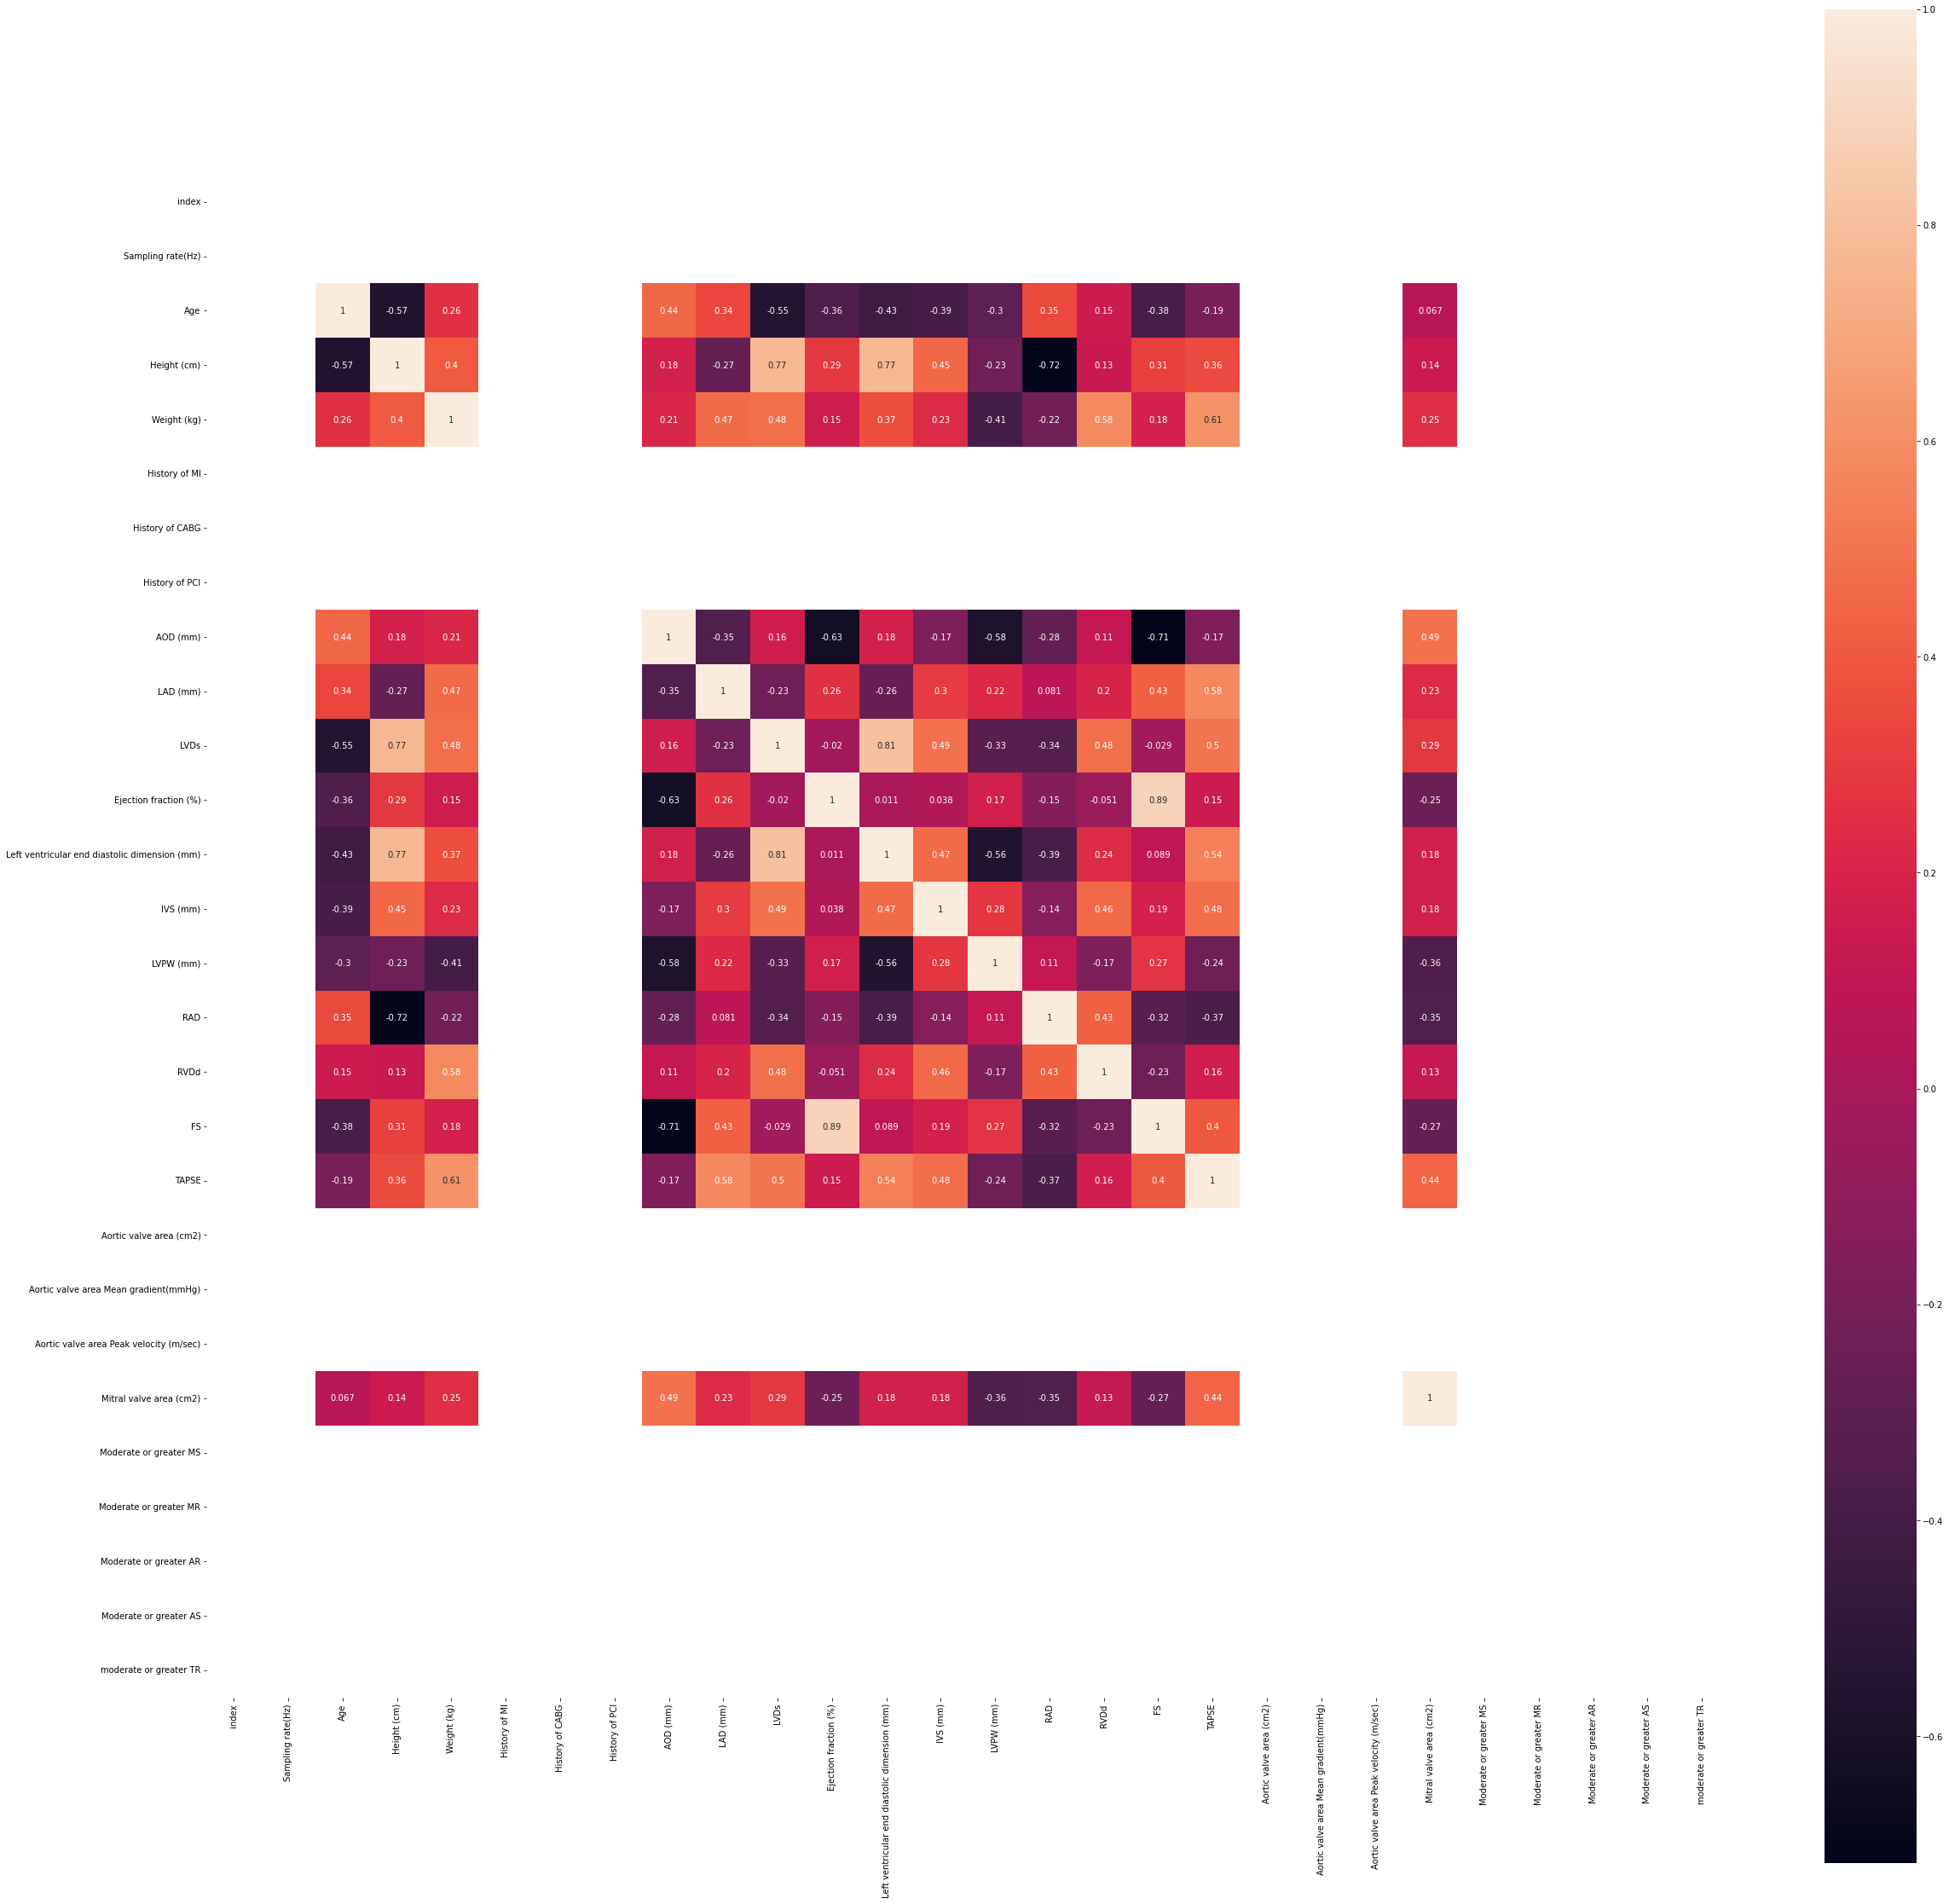

In [24]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(40,40)
sns.heatmap(df_p_ms.corr(), square = True, annot = True)

<AxesSubplot:>

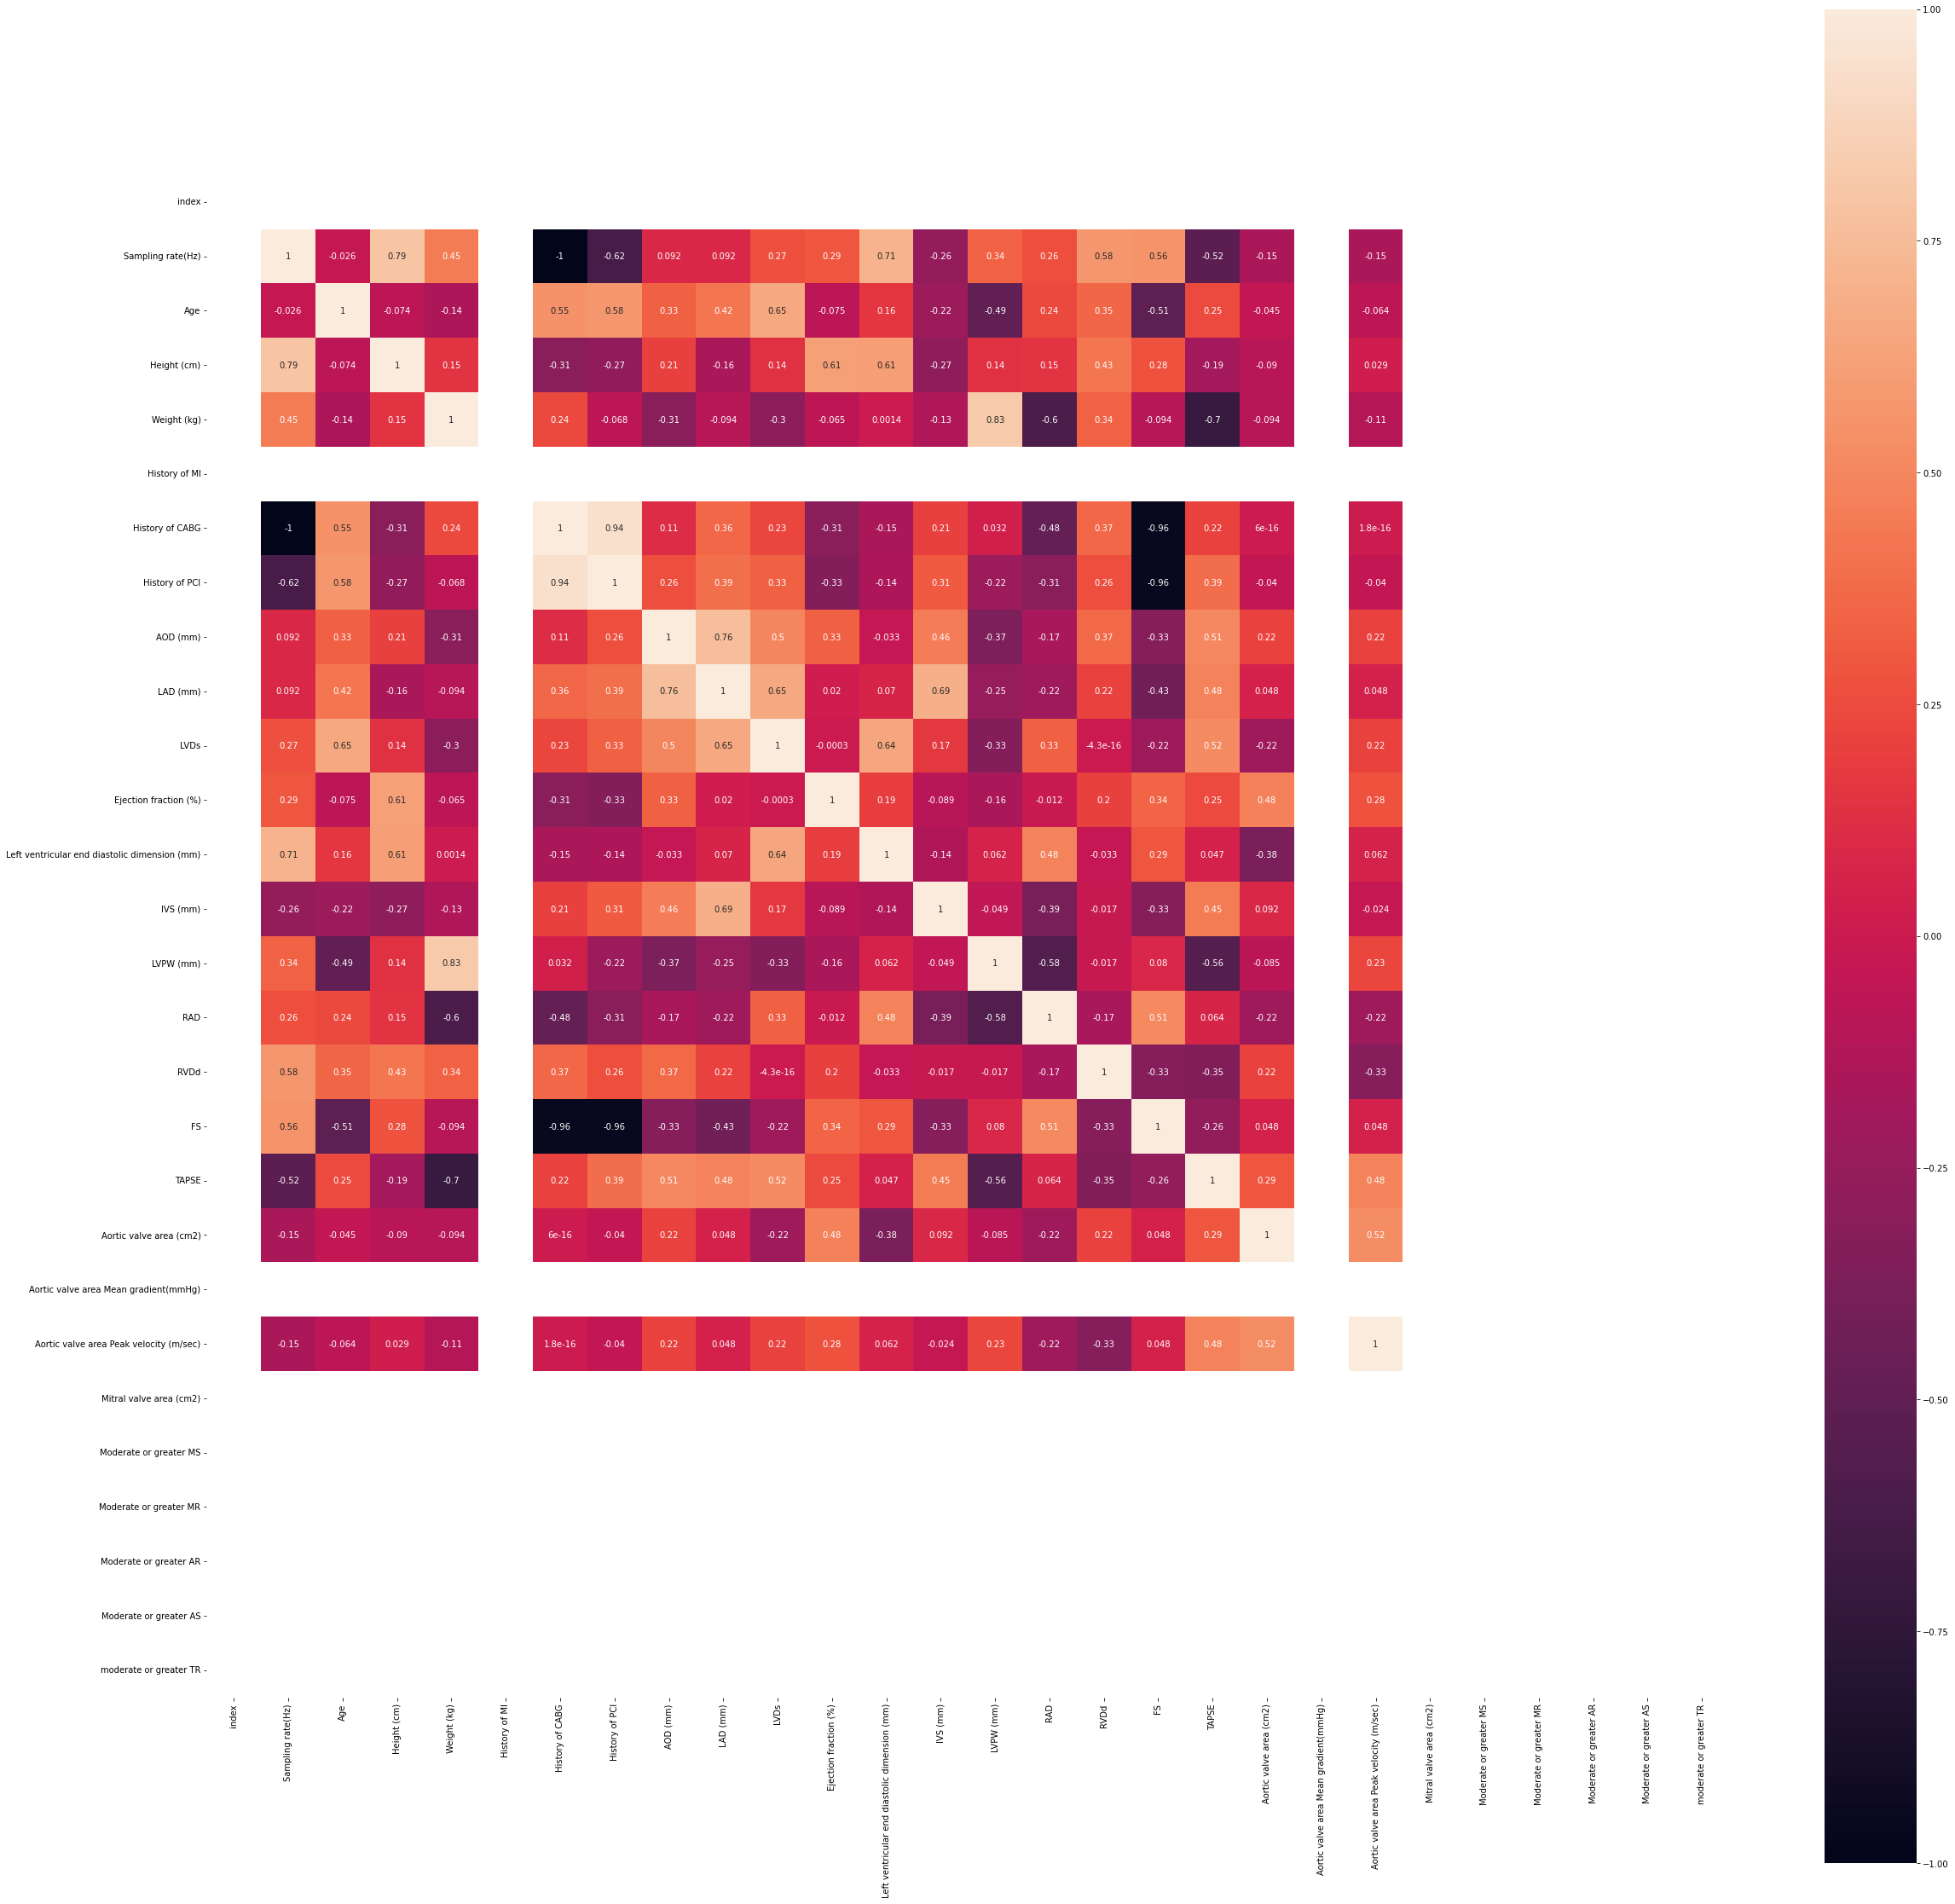

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
sns.heatmap(df_p_as.corr(), square = True, annot = True)

<AxesSubplot:>

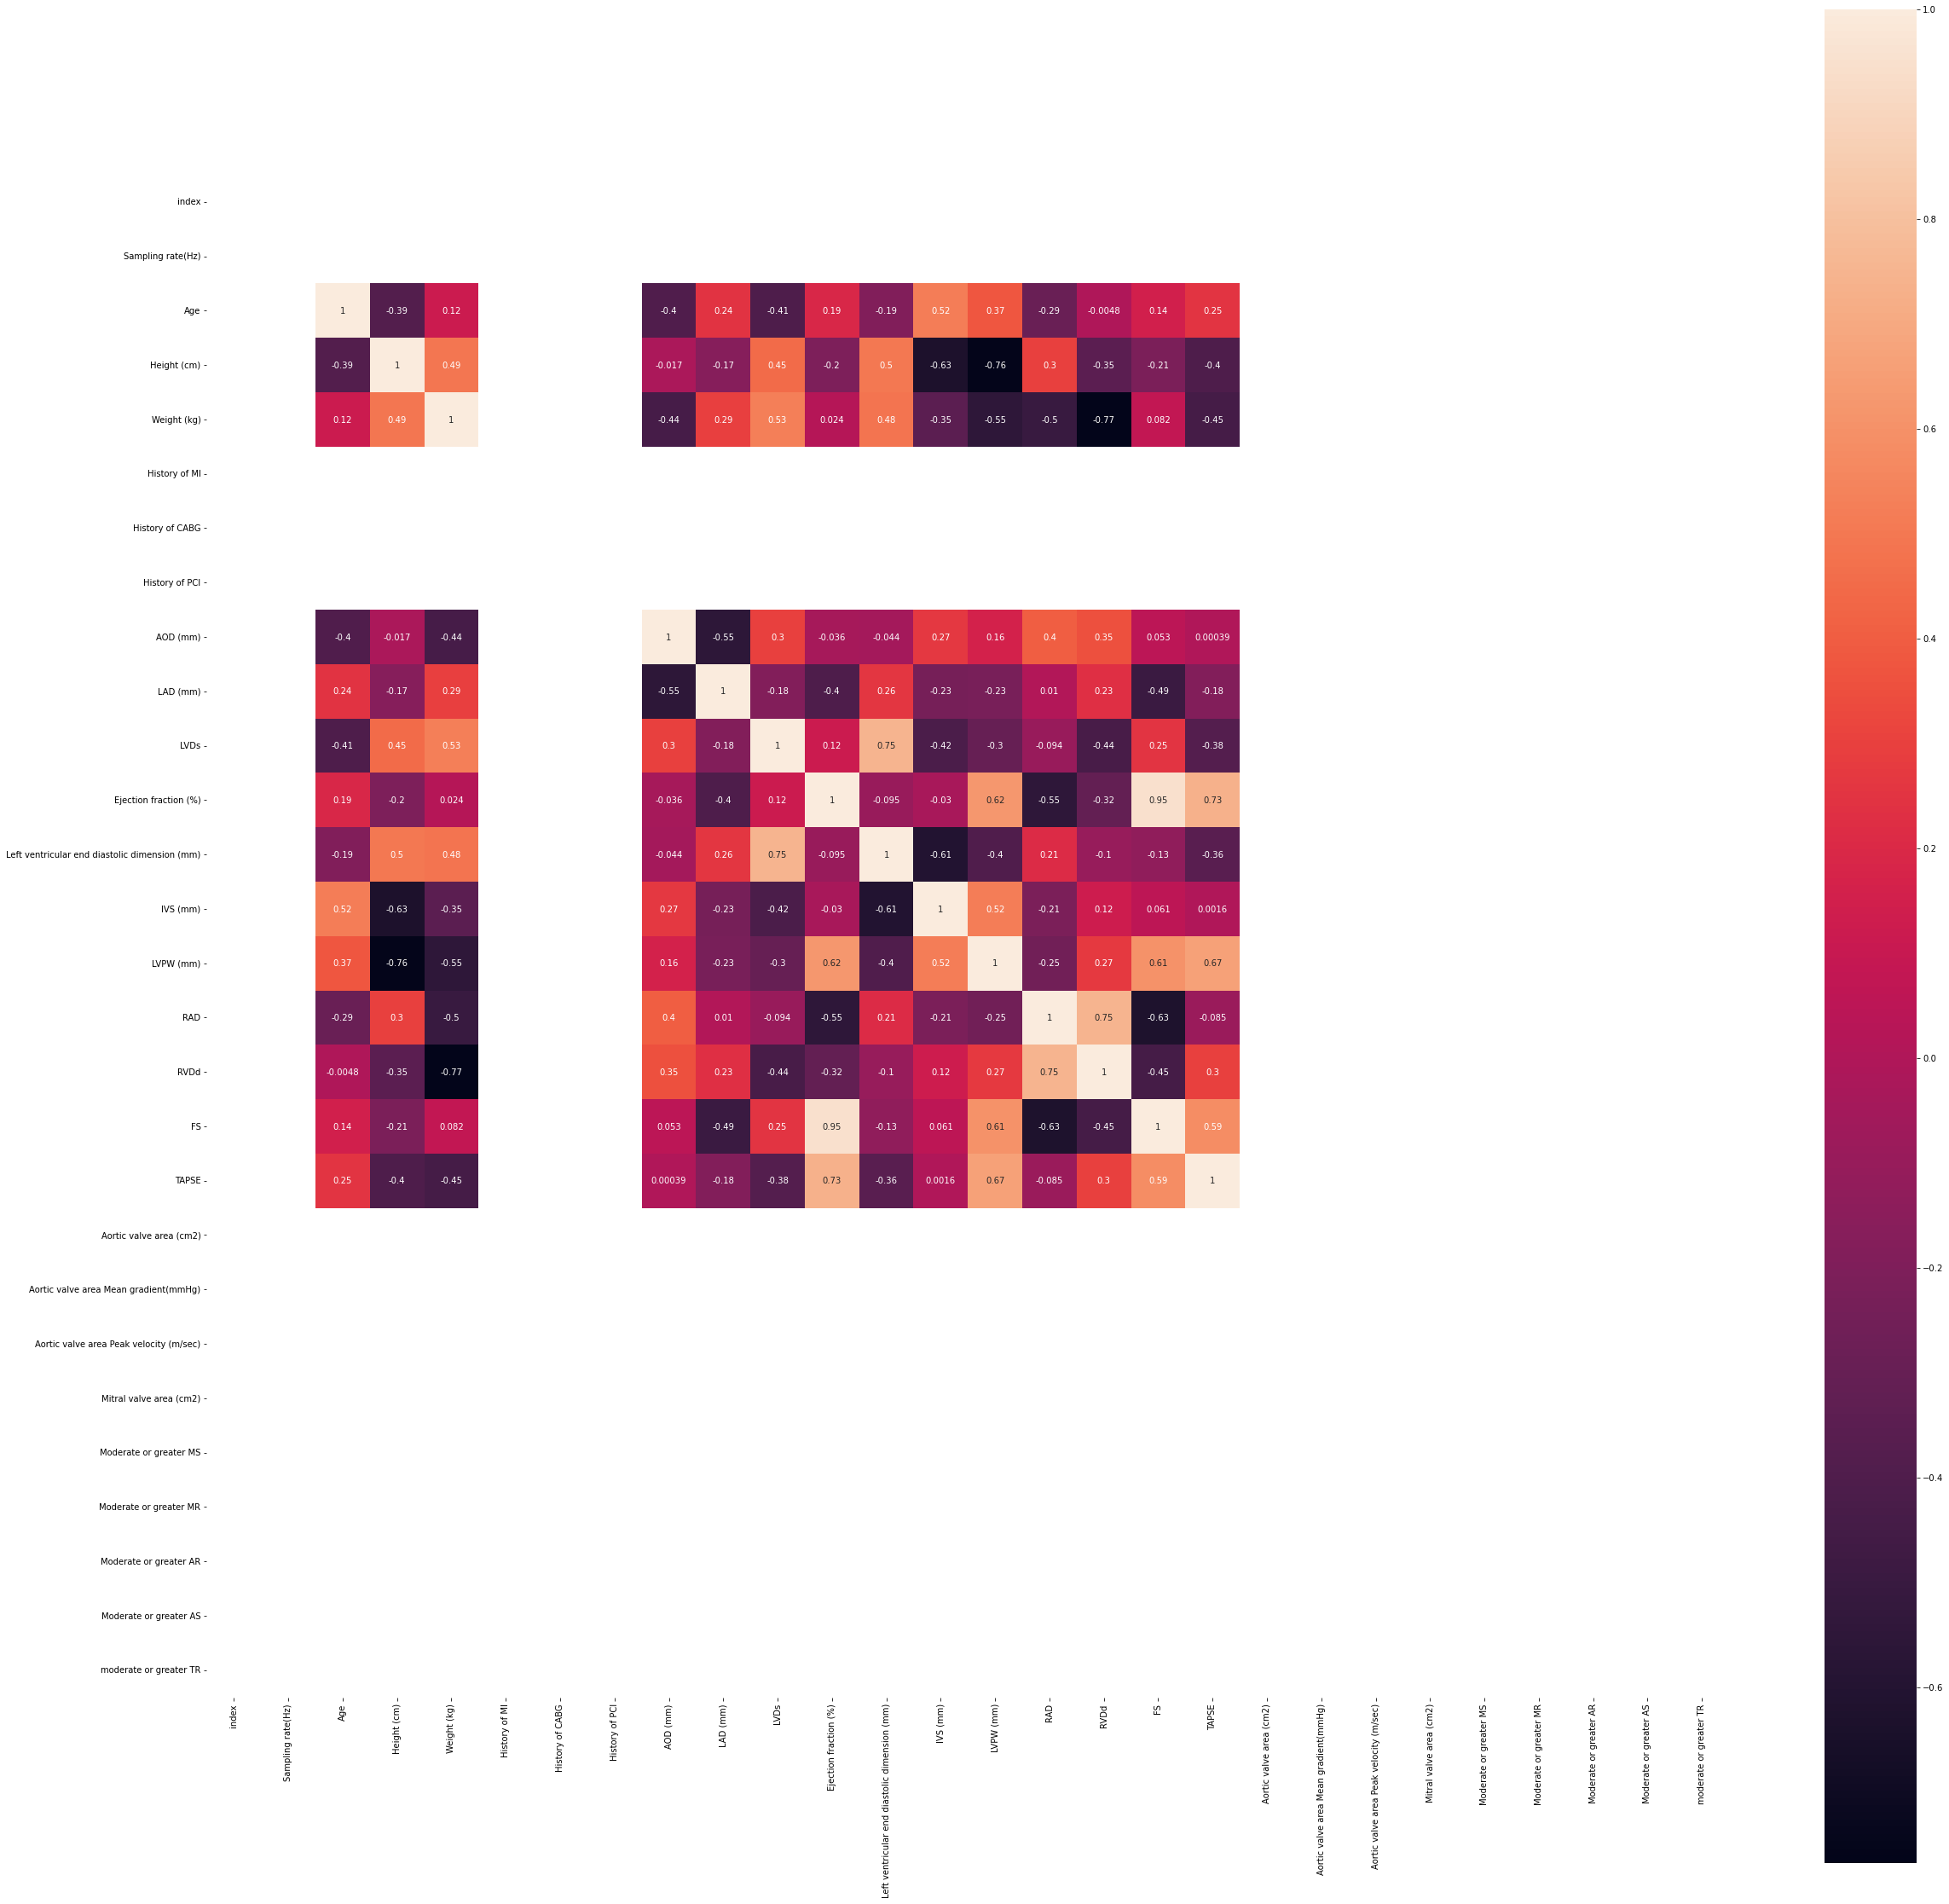

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
sns.heatmap(df_p_ar.corr(), square = True, annot = True)

<AxesSubplot:>

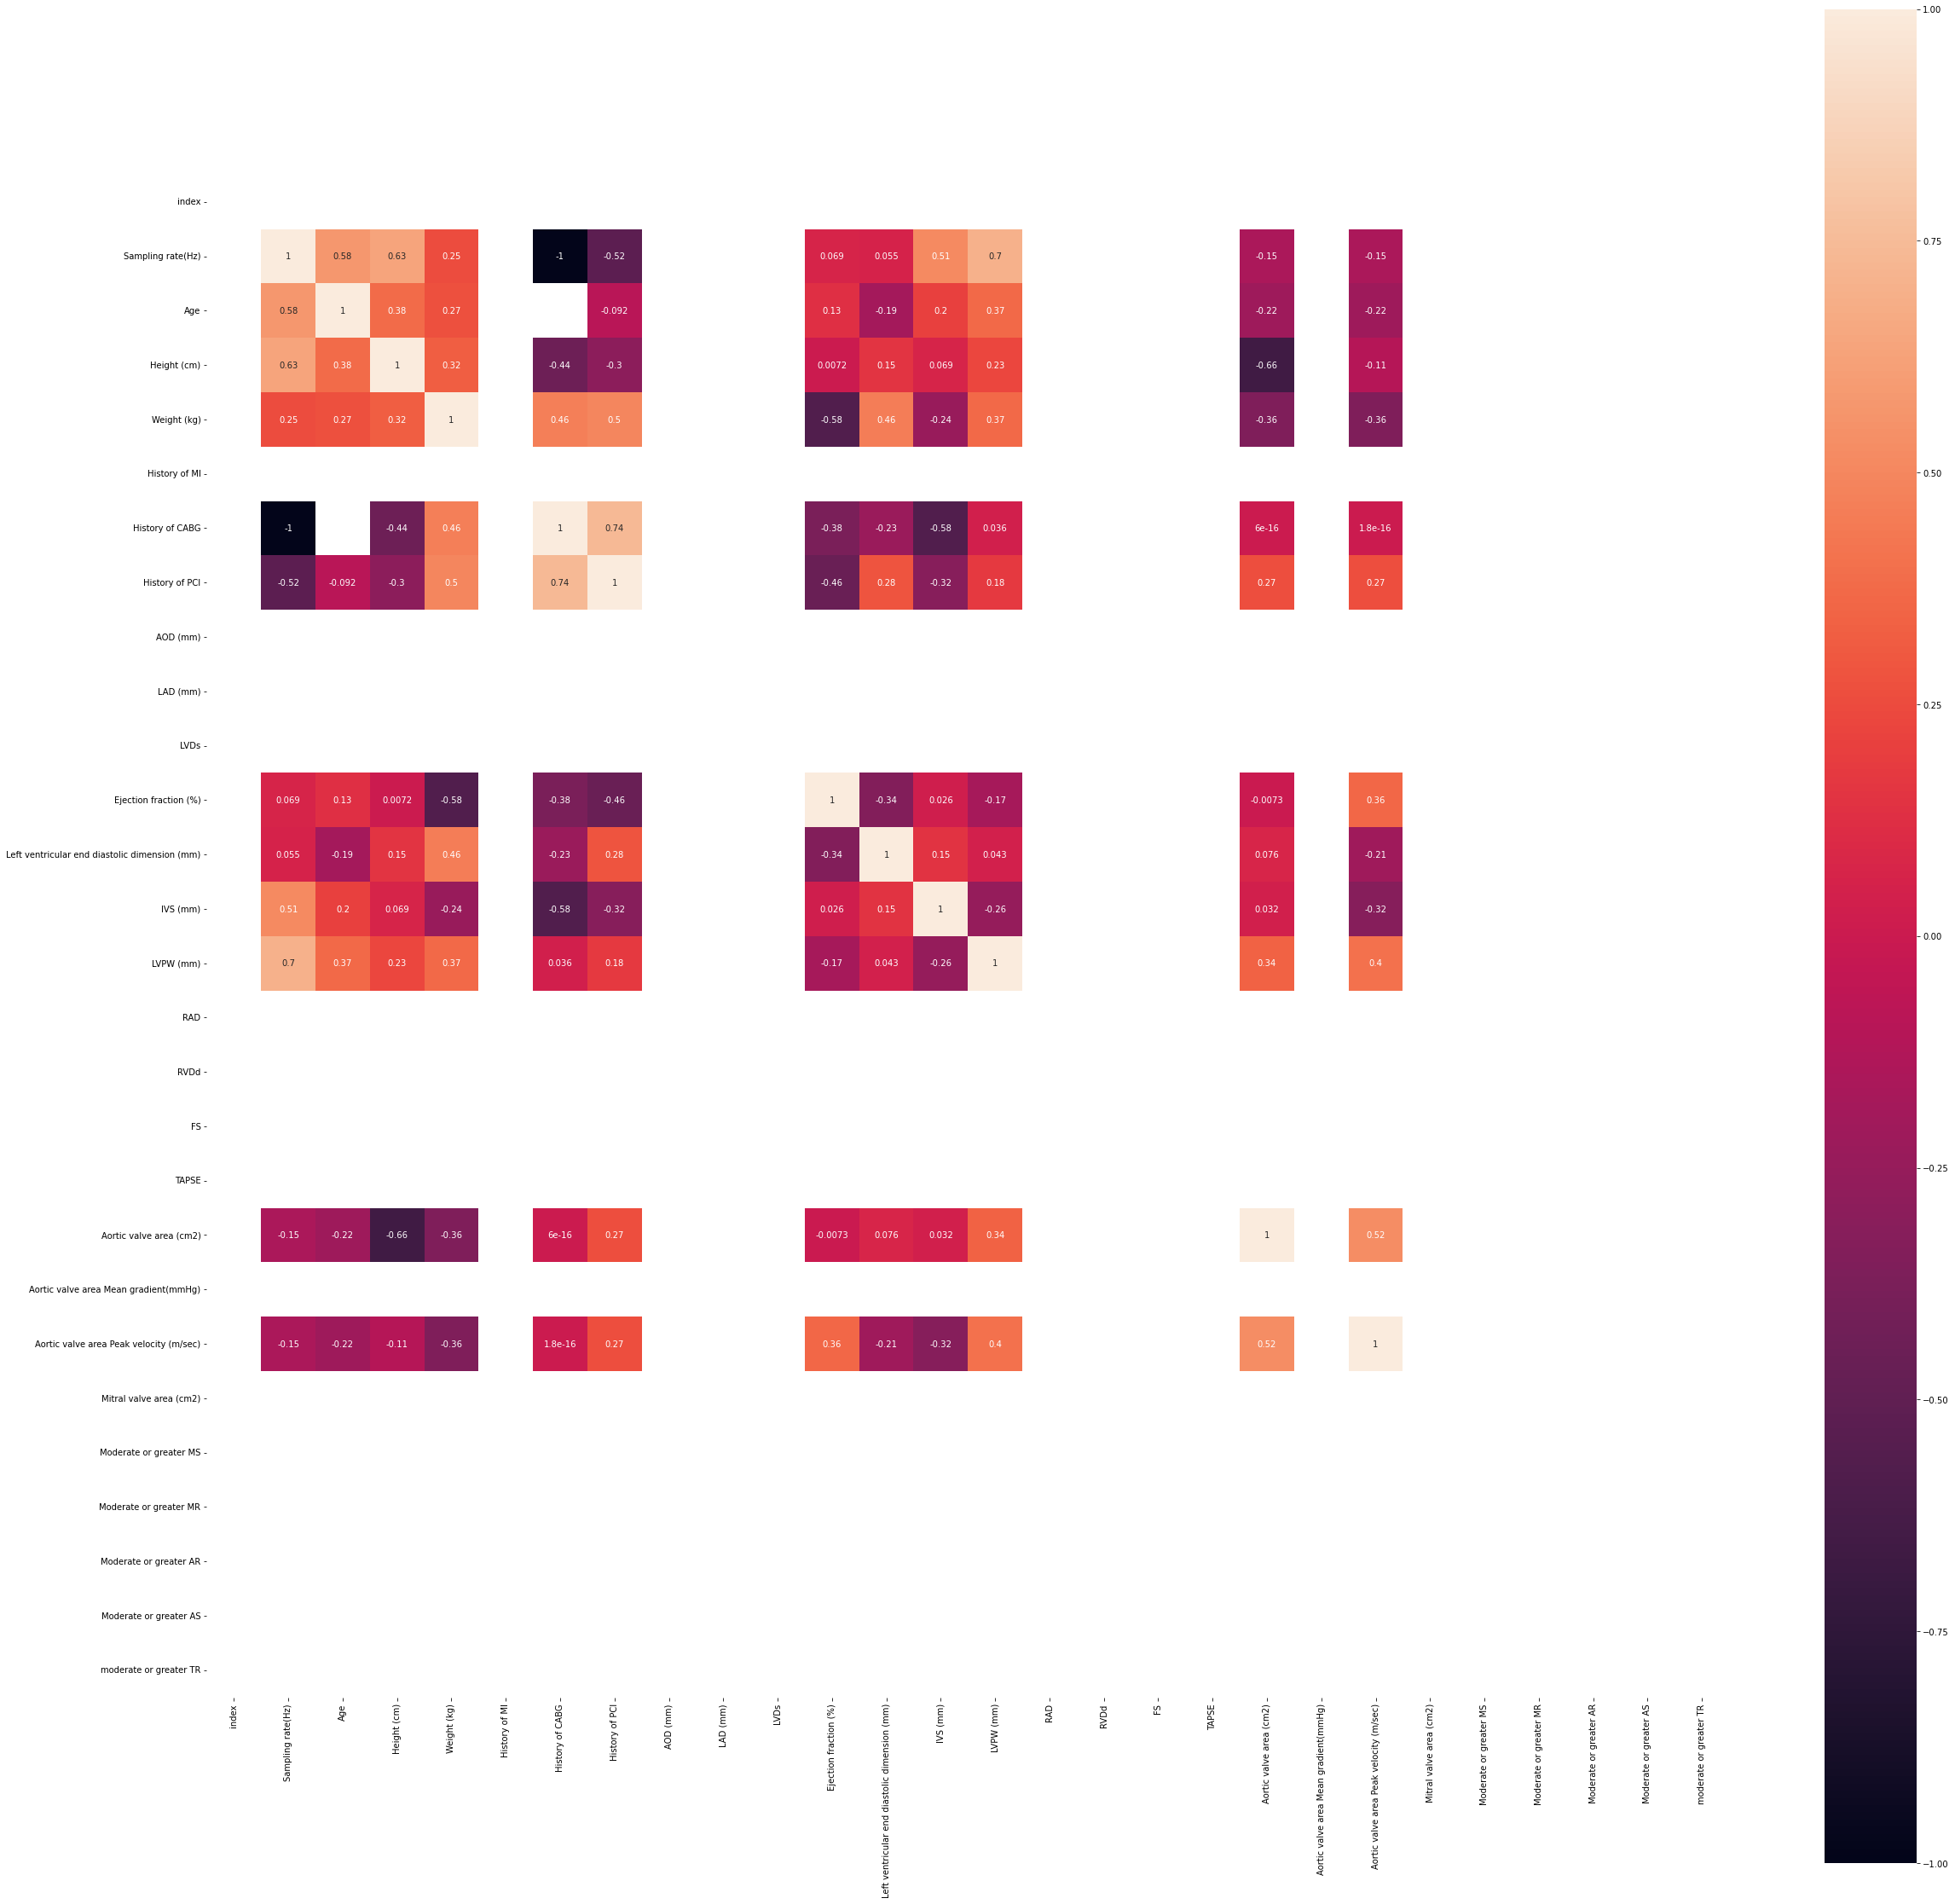

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
sns.heatmap(df_p_ms_as.corr(), square = True, annot = True)

<AxesSubplot:>

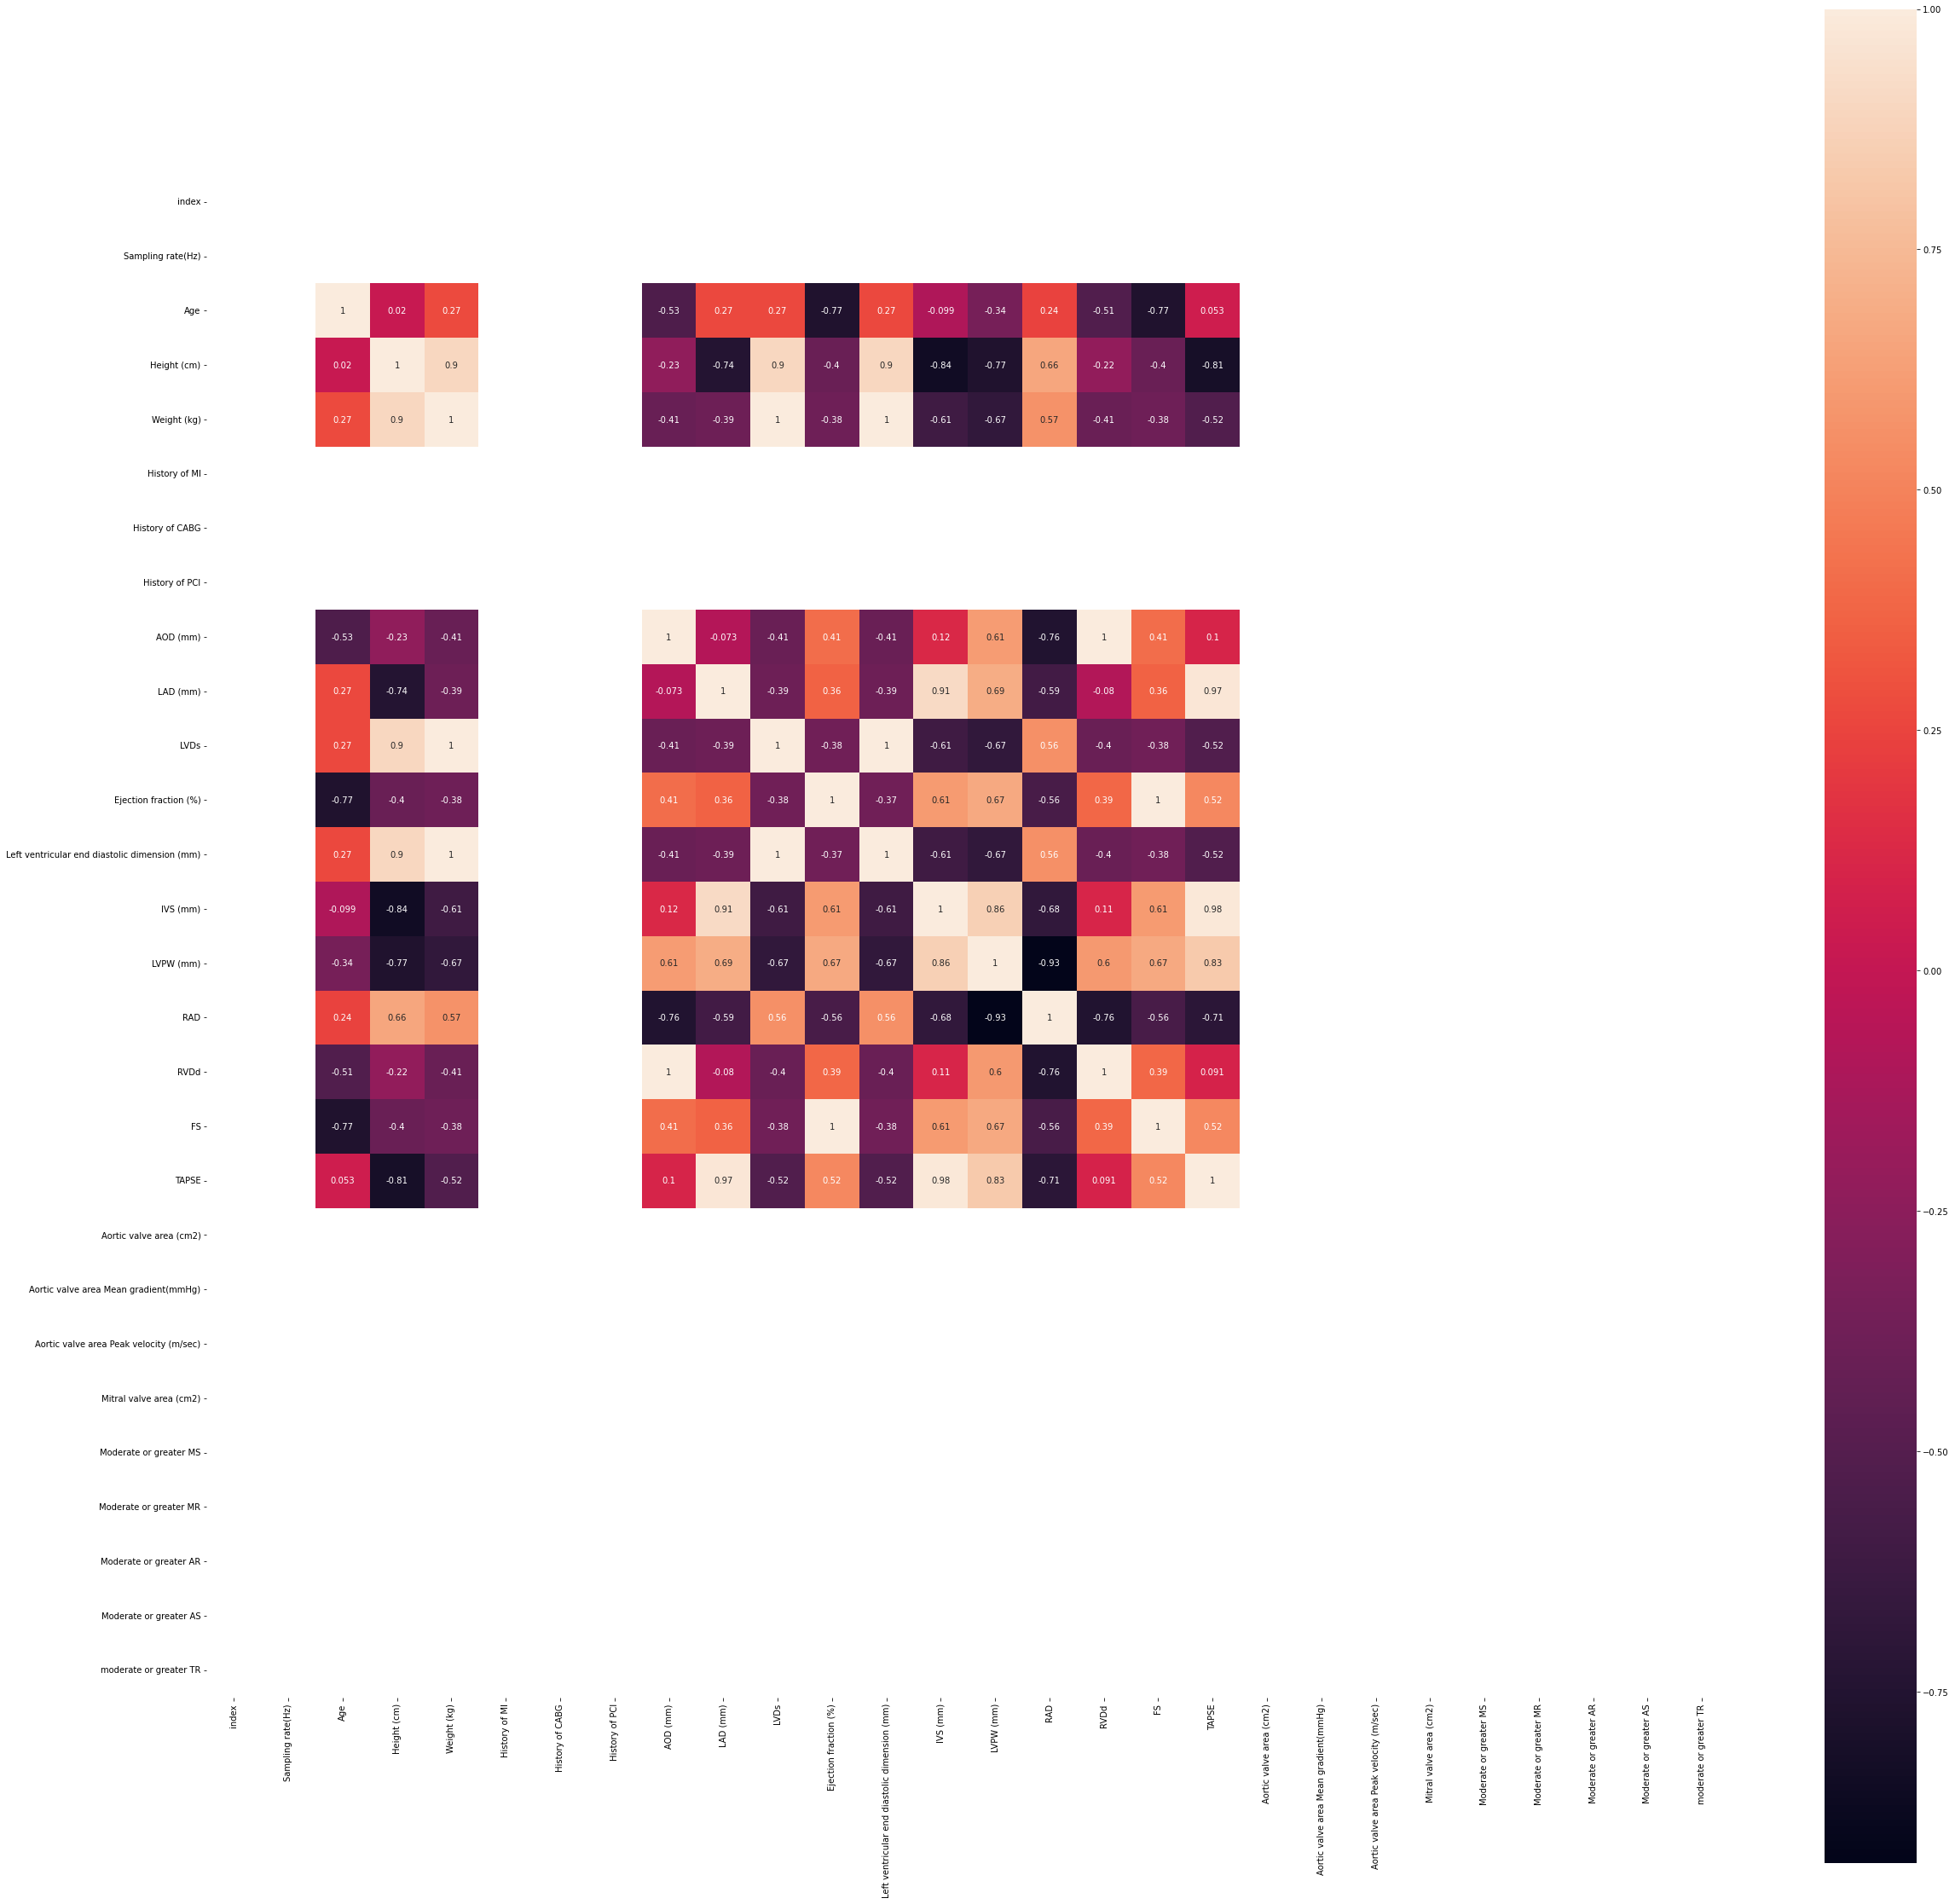

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
sns.heatmap(df_p_ms_ar.corr(), square = True, annot = True)

<AxesSubplot:>

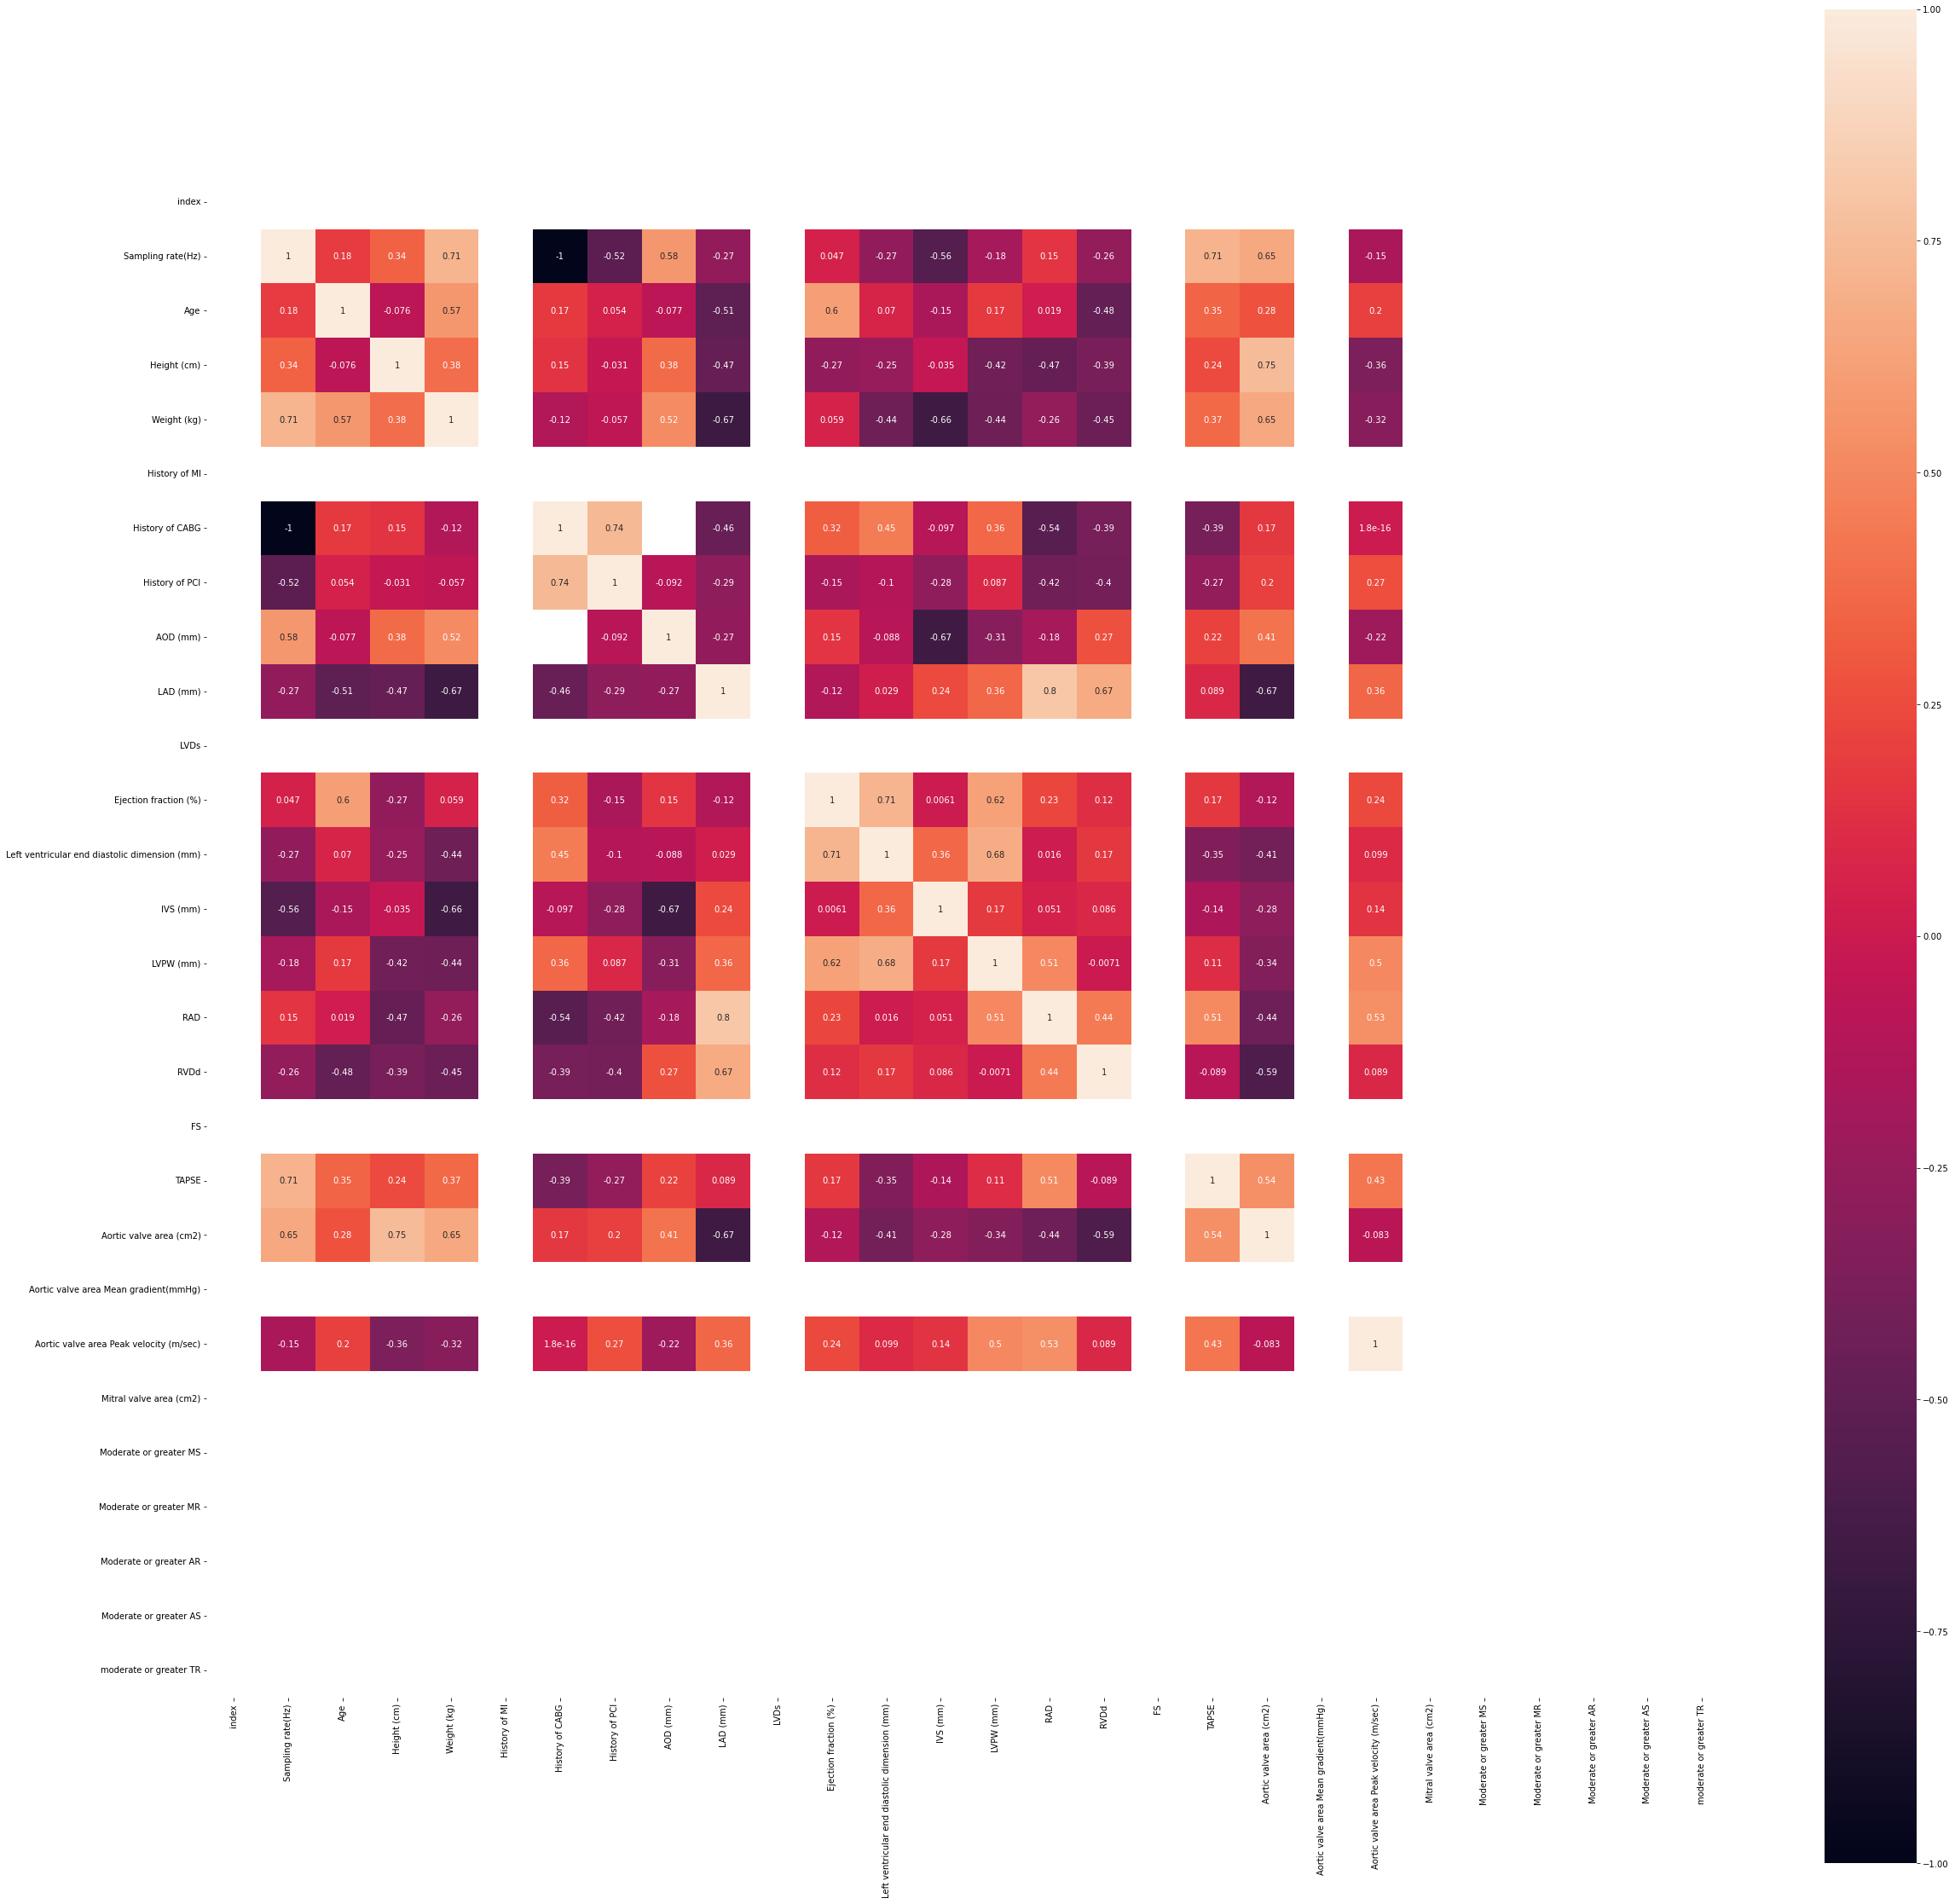

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
sns.heatmap(df_p_as_ar.corr(), square = True, annot = True)